In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ticktack
from ticktack import fitting
import os
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

In [2]:
units = "atoms"

In [3]:
events = ["775AD-late-N", "775AD-early", "993AD", "663BCE", "5259BCE", "5410BCE", "7176BCE"]
titles = ["775CE Sharp-Rise", "775CE Prolonged-Rise", "993CE", "663BCE", "5259BCE", "5410BCE", "7176BCE"]
cbm_models = ["Guttler14", "Buntgen18", "Brehm21",]
steady_state = []
for cbm_model in cbm_models:
    cbm = ticktack.load_presaved_model(cbm_model, production_rate_units='atoms/cm^2/s')
    sf = fitting.SingleFitter(cbm, cbm_model=cbm_model, hemisphere="north")
    steady_state.append(sf.steady_state_production)

cbm_names = ["Güttler et al, 2015: 11-box", "Büntgen et al, 2018: 22-box", "Brehm et al, 2021: 22-box"]
colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#e41a1c', '#56B4E9', '#999999', ]
# colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
# colors.remove("#F0E442")
# colors.append("#999999")
# colors.append("#e41a1c")

INFO[2022-02-07 21:01:03,904]: Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: 
INFO[2022-02-07 21:01:03,905]: Unable to initialize backend 'gpu': Not found: Could not find registered platform with name: "cuda". Available platform names are: Interpreter Host
INFO[2022-02-07 21:01:03,906]: Unable to initialize backend 'tpu': Invalid argument: TpuPlatform is not available.
WARNING[2022-02-07 21:01:03,907]: No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
Guttler14 = np.zeros((12000, 7))
Buntgen18 = np.zeros((12000, 7))
Brehm21 = np.zeros((12000, 7))

In [5]:
if units == "atoms":
    conversion = 1
else:
    conversion = 14.003242 / 6.022 * 5.11 * 31536. / 1e5 
for i, event in enumerate(events):
    Guttler14[:, i] = np.load("chain/{}_Guttler14.npy".format(event))[:, 4] * conversion
for i, event in enumerate(events):
    Buntgen18[:, i] = np.load("chain/{}_Buntgen18.npy".format(event))[:, 4] * conversion
for i, event in enumerate(events):
    Brehm21[:, i] = np.load("chain/{}_Brehm21.npy".format(event))[:, 4] * conversion

In [6]:
chains = []
chains.append(Guttler14); 
chains.append(Buntgen18); chains.append(Brehm21);

In [7]:
# cf = fitting.CarbonFitter()
# fig = cf.plot_multiple_chains(chains, 12, plot_dists=True, figsize=(10, 5), params_labels=titles, labels=cbm_names)

In [8]:
import seaborn as sns
custom_lines = [Line2D([0], [0], color=colors[i], lw=1.5, label=cbm_names[i]) for i in range(len(cbm_models))]

/tmp/ipykernel_13383/2910446846.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace=0.4)


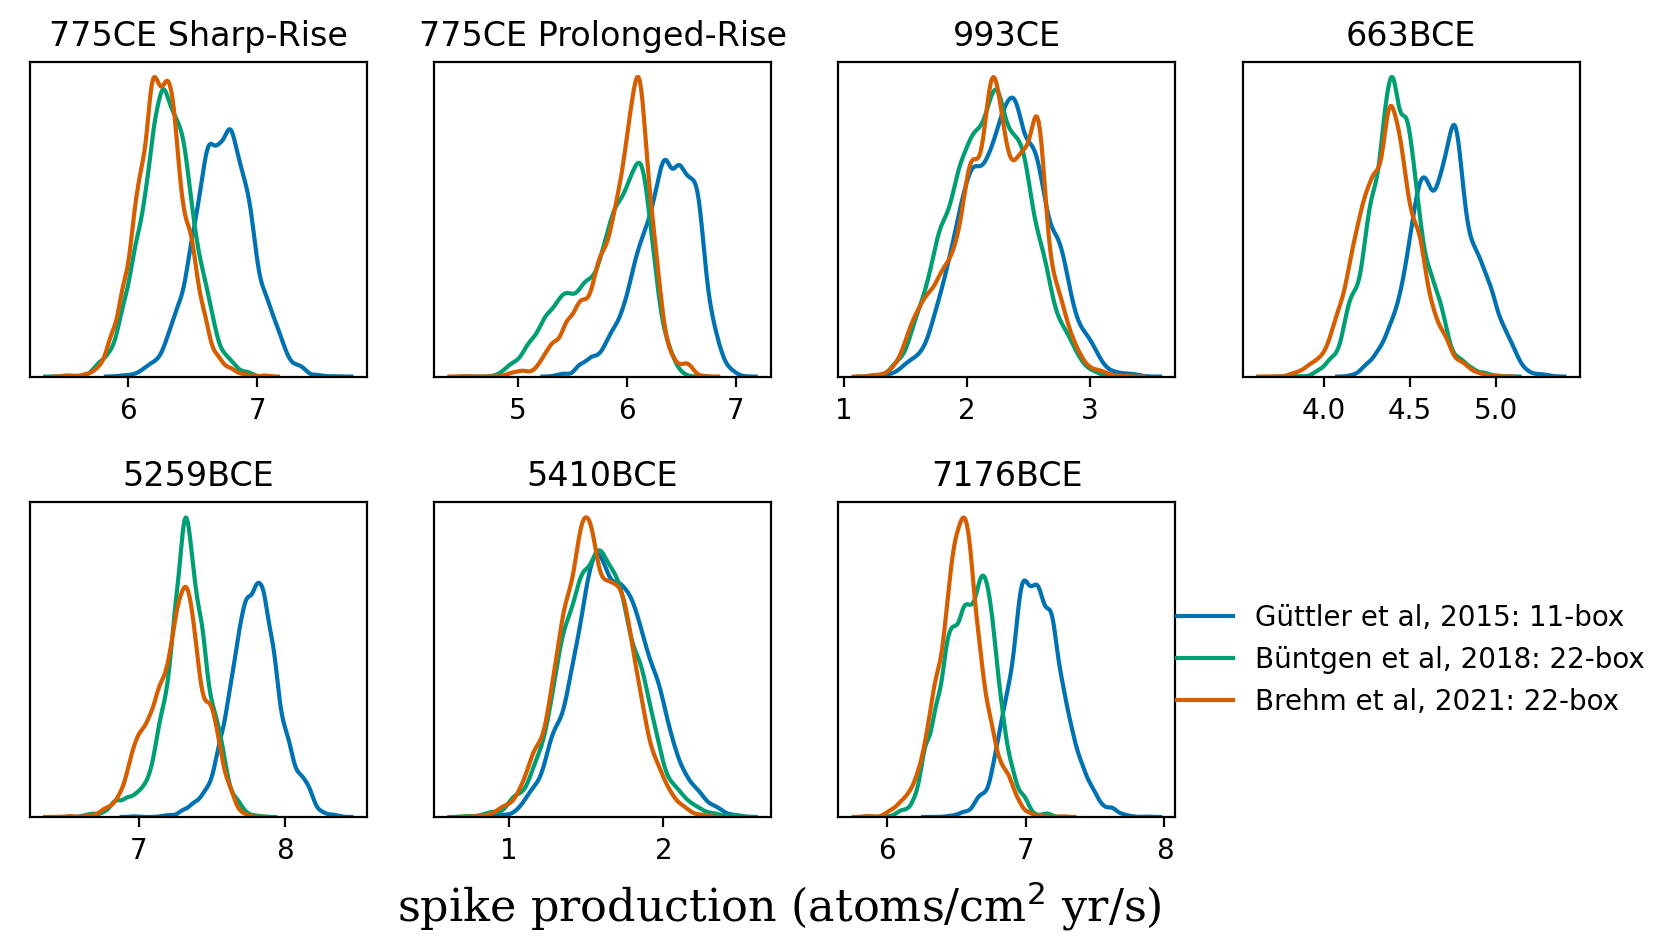

In [9]:
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
fig.subplots_adjust(hspace=0.4)
spec = fig.add_gridspec(ncols=4, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
ax0.axes.yaxis.set_visible(False)
ax1 = fig.add_subplot(spec[0, 1])
ax1.axes.yaxis.set_visible(False)

ax2 = fig.add_subplot(spec[0, 2])
ax2.axes.yaxis.set_visible(False)
ax3 = fig.add_subplot(spec[0, 3])
ax3.axes.yaxis.set_visible(False)

ax4 = fig.add_subplot(spec[1, 0])
ax4.axes.yaxis.set_visible(False)
ax5 = fig.add_subplot(spec[1, 1])
ax5.axes.yaxis.set_visible(False)

ax6 = fig.add_subplot(spec[1, 2])
ax6.axes.yaxis.set_visible(False)
ax7 = fig.add_subplot(spec[1, 3])
ax7.axes.yaxis.set_visible(False)

ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
ax7.spines['bottom'].set_visible(False)
ax7.spines['left'].set_visible(False)
ax7.xaxis.set_ticks([]); 
ax7.xaxis.set_ticklabels([]); 

axs = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]
for i in range(7):
    sns.kdeplot(Guttler14[:, i], ax=axs[i]); sns.kdeplot(Buntgen18[:, i], ax=axs[i]); sns.kdeplot(Brehm21[:, i], ax=axs[i]);
    axs[i].set_title(titles[i])
ax7.legend(handles=custom_lines, frameon=False, loc="center", fontsize=10);
if units == "atoms":
    fig.supxlabel("spike production (atoms/cm$^2$ yr/s)", fontsize=16, fontfamily="serif", fontweight="roman");
    fig.savefig("density-plot-atoms.jpg")
else:
    fig.supxlabel("spike production (kg)", fontsize=16, fontfamily="serif", fontweight="roman");
    fig.savefig("density-plot-kg.jpg")

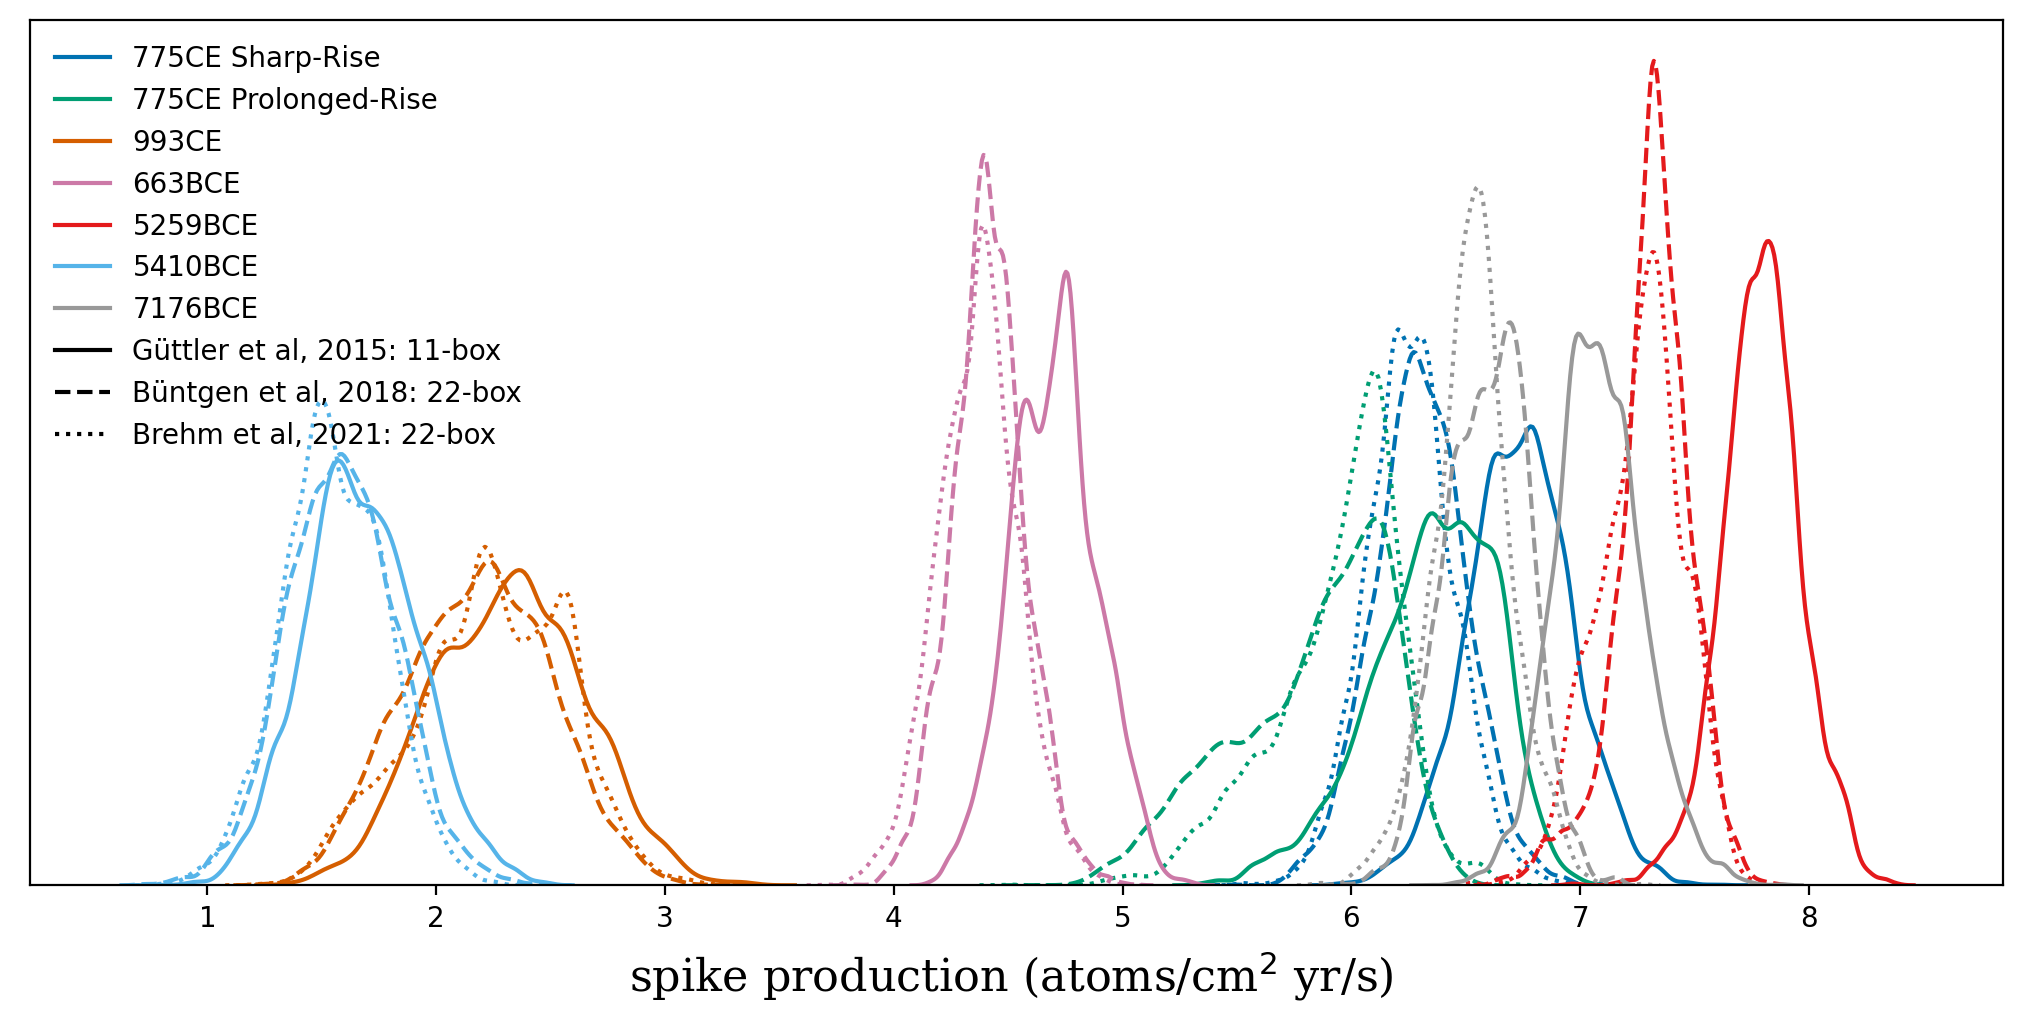

In [10]:
fmt = ["-", "--", ":"]
custom_lines = [Line2D([0], [0], color=colors[i], lw=1.5, label=titles[i]) for i in range(len(titles))]
for i in range(len(cbm_names)):
    custom_lines.append(Line2D([0], [0], ls=fmt[i], color="k", lw=1.5, label=cbm_names[i]))
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])
for i in range(0, 7):
    sns.kdeplot(Guttler14[:, i], ls=fmt[0], color=colors[i], ax=ax,); 
    sns.kdeplot(Buntgen18[:, i], color=colors[i], ls=fmt[1], ax=ax,); 
    sns.kdeplot(Brehm21[:, i], ls=fmt[2], color=colors[i], ax=ax,);
ax.legend(handles=custom_lines, frameon=False, fontsize=10);
ax.axes.yaxis.set_visible(False)
# ax.set_xlim(-1, 9)
if units == "atoms":
    fig.supxlabel("spike production (atoms/cm$^2$ yr/s)", fontsize=16, fontfamily="serif", fontweight="roman");
    fig.savefig("density-plot-atoms.jpg")
else:
    fig.supxlabel("spike production (kg)", fontsize=16, fontfamily="serif", fontweight="roman");
    fig.savefig("density-plot-kg.jpg")

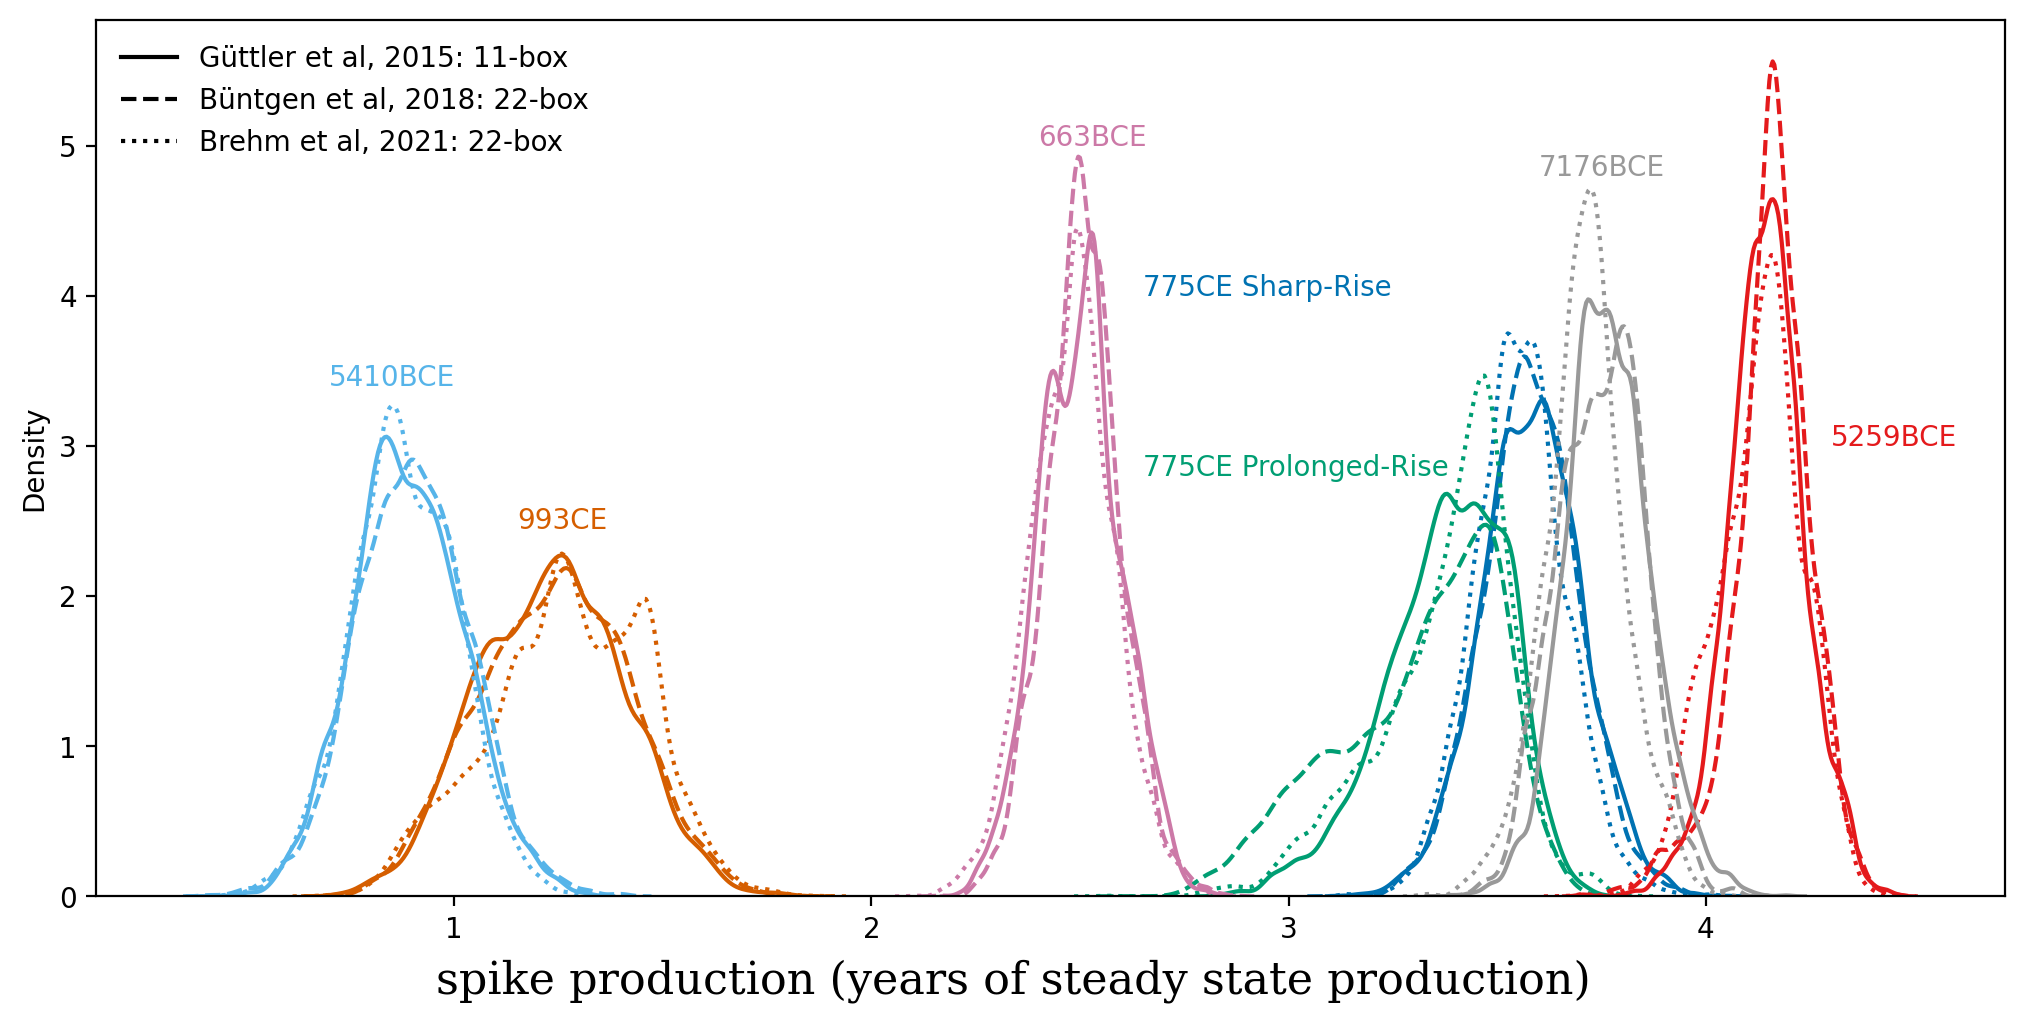

In [14]:
fmt = ["-", "--", ":"]
custom_lines = [Line2D([0], [0], ls=fmt[i], color="k", lw=1.5, label=cbm_names[i]) for i in range(len(cbm_names))]
fig = plt.figure(figsize=(10, 5), dpi=200, constrained_layout=True)
spec = fig.add_gridspec(ncols=1, nrows=1)
ax = fig.add_subplot(spec[0, 0])
for i in range(0, 7):
    sns.kdeplot(Guttler14[:, i] / steady_state[0], ls=fmt[0], color=colors[i], ax=ax, clip=(0, 15)); 
    sns.kdeplot(Buntgen18[:, i] / steady_state[1], color=colors[i], ls=fmt[1], ax=ax, clip=(0, 15)); 
    sns.kdeplot(Brehm21[:, i] / steady_state[2], ls=fmt[2], color=colors[i], ax=ax, clip=(0, 15));
ax.legend(handles=custom_lines, frameon=False, fontsize=10, loc="upper left");
# ax.axes.yaxis.set_visible(False)

plt.text(x=2.65, y=4, s=titles[0], color=colors[0])
plt.text(x=2.65, y=2.8, s=titles[1], color=colors[1])
plt.text(x=1.15, y=2.45, s=titles[2], color=colors[2])
plt.text(x=2.4, y=5, s=titles[3], color=colors[3])
plt.text(x=4.3, y=3, s=titles[4], color=colors[4])
plt.text(x=0.7, y=3.4, s=titles[5], color=colors[5])
plt.text(x=3.6, y=4.8, s=titles[6], color=colors[6])

if units == "atoms":
    fig.supxlabel("spike production (years of steady state production)", fontsize=16, fontfamily="serif", fontweight="roman");
    fig.savefig("density-plot-steady_state.pdf")
else:
    fig.supxlabel("spike production (years of steady state production)", fontsize=16, fontfamily="serif", fontweight="roman");
    fig.savefig("density-plot-steady_state.pdf")